In [207]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',100)

In [208]:
df= pd.read_csv("application_data.csv")

In [209]:
df.shape

(307511, 122)

Columns to drop with more than 40% Null's

In [210]:
drop_cols=df.isnull().sum()[df.isnull().sum()/df.shape[0] > .4]/df.shape[0]
df.drop(columns=drop_cols.index,inplace=True)


Datatype check : All the remaining columns has correct datatype

In [211]:
not_req=['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_PHONE',
       'FLAG_EMAIL','CNT_CHILDREN','NAME_TYPE_SUITE',]

In [212]:
df.drop(columns=not_req,inplace=True)

In [213]:
df.shape

(307511, 38)

In [ ]:
CNT_FAM_MEMBERS ,  NAME_TYPE_SUITE , CNT_FAM_MEMBERS , REGION_RATING_CLIENT,  REGION_RATING_CLIENT_W_CITY, 

New col FAMILY_SIZE, derived from CNT_FAM_MEMBERS and then droping the CNT_FAM_MEMBERS column 


In [214]:
df.CNT_FAM_MEMBERS.value_counts(ascending=False,normalize=True)
#Bins divided on basis of Normalized values
df['FAMILY_SIZE']=pd.cut(df.CNT_FAM_MEMBERS,bins=[0,1,3,5,15],labels=['Single','Small','Medium','Large'])
df.drop(columns='CNT_FAM_MEMBERS',inplace=True)

In [216]:
df['AGE_IN_YEARS']=round(abs(df.DAYS_BIRTH)/365)

df.AGE_IN_YEARS.value_counts(ascending=False,normalize=True)

# Drop DAYS_BIRTH variable 
df.drop(columns='DAYS_BIRTH',inplace=True)

In [224]:
df['EXPERIENCE_IN_YEARS']=round(abs(df.DAYS_EMPLOYED)/365)
df.EXPERIENCE_IN_YEARS.value_counts()
# Check if any anomolies in the Age variable and make it NaN
df.loc[df.EXPERIENCE_IN_YEARS>100,'EXPERIENCE_IN_YEARS']=np.NaN
# Drop DAYS_BIRTH variable 
df.drop(columns='DAYS_EMPLOYED',inplace=True)

In [227]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FAMILY_SIZE,AGE_IN_YEARS,EXPERIENCE_IN_YEARS
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,Laborers,2,2,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Single,26.0,2.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,Core staff,1,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Small,46.0,3.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,Laborers,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Single,52.0,1.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,Laborers,2,2,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,Small,52.0,8.0
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,Core staff,2,2,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Single,55.0,8.0


In [244]:
df.REGION_POPULATION_RELATIVE.describe(percentiles=[.33,.66])

# based on the max value on REGION_POPULATION_RELATIVE variable 1/3rd and 2/3rd calculated, created a new column Population Density.

df['POPULATION_DENSITY']=pd.cut(df.REGION_POPULATION_RELATIVE,bins=[0,0.024,0.048,1],labels=['Low','Medium','High'])

# drop REGION_POPULATION_RELATIVE
df.drop(columns='REGION_POPULATION_RELATIVE',inplace=True)

In [259]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FAMILY_SIZE,AGE_IN_YEARS,EXPERIENCE_IN_YEARS,POPULATION_DENSITY,REGISTRATION_IN_YEARS,ID_PUBLISH_IN_YEARS
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,2,2,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Single,26.0,2.0,Low,10.0,6.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,1,Core staff,1,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Small,46.0,3.0,Low,3.0,1.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,2,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Single,52.0,1.0,Low,12.0,7.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,Laborers,2,2,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,Small,52.0,8.0,Low,27.0,7.0
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Core staff,2,2,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Single,55.0,8.0,Medium,12.0,9.0


In [252]:
df['REGISTRATION_IN_YEARS']=round(abs(df.DAYS_REGISTRATION)/365)
df.REGISTRATION_IN_YEARS.value_counts()

# Drop DAYS_BIRTH variable 
df.drop(columns='DAYS_REGISTRATION',inplace=True)

In [258]:
df['ID_PUBLISH_IN_YEARS']=round(abs(df.DAYS_ID_PUBLISH)/365)
df.ID_PUBLISH_IN_YEARS.value_counts()

# Drop DAYS_BIRTH variable 
df.drop(columns='DAYS_ID_PUBLISH',inplace=True)

In [303]:
df_0.AGE_IN_YEARS.describe()
df['AGE_RANGE']=pd.cut(df_0.AGE_IN_YEARS,bins=[0,34,43,54,100],labels=['<34','34-43','43-54','>54'])

In [320]:
#EXPERIENCE_IN_YEARS
df_0.EXPERIENCE_IN_YEARS.value_counts()

lab=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50']
df['EXPERIENCE_RANGE']=pd.cut(df_0.EXPERIENCE_IN_YEARS,bins=list(np.arange(0,51,5)),labels=lab)

In [324]:
df.TARGET.value_counts(normalize=True)
df_0=df[df.TARGET==0]
df_1=df[df.TARGET==1]

In [307]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, hue = hue) 
        #order=df[col].value_counts().index,
    plt.show()

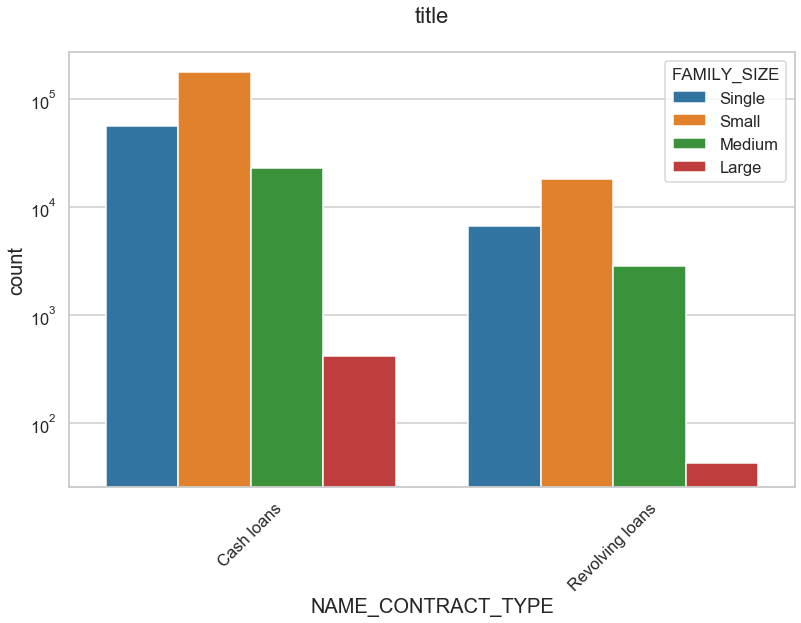

In [289]:

uniplot(df_0,'NAME_CONTRACT_TYPE','title','FAMILY_SIZE')
#sns.countplot(x='NAME_CONTRACT_TYPE',data=df_0,hue='FAMILY_SIZE')
#plt.show()

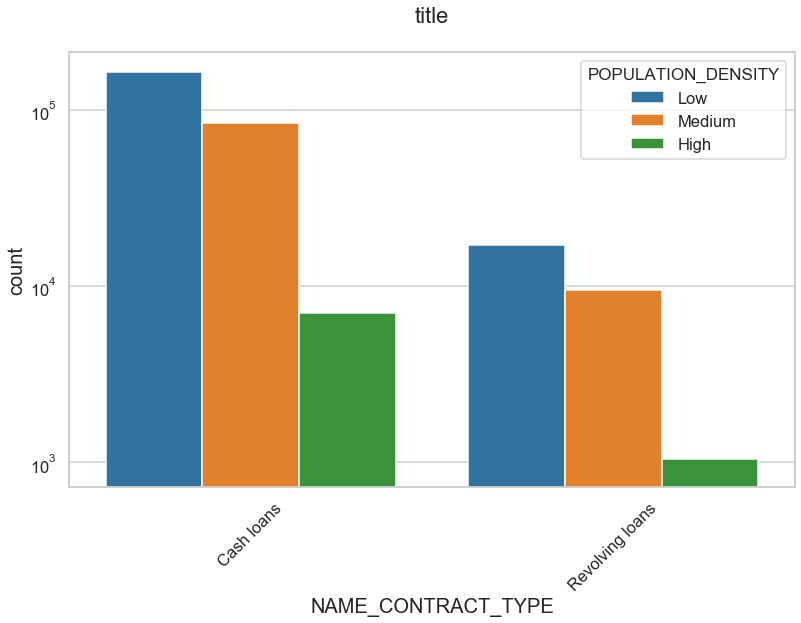

In [291]:
uniplot(df_0,'NAME_CONTRACT_TYPE','title','POPULATION_DENSITY')
#sns.countplot(x='NAME_CONTRACT_TYPE',data=df_0,hue='POPULATION_DENSITY')
#plt.show()

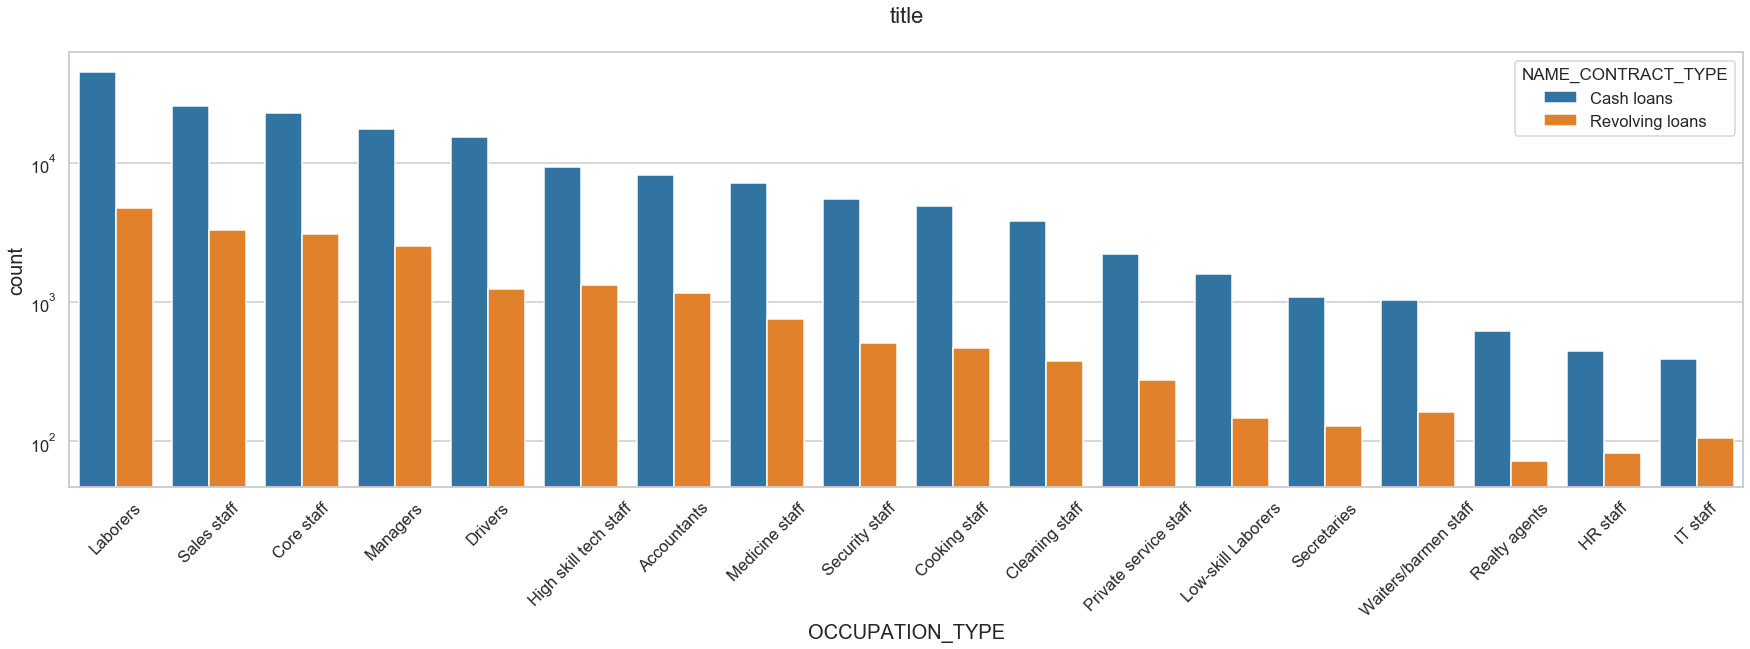

In [292]:

uniplot(df_0,'OCCUPATION_TYPE','title','NAME_CONTRACT_TYPE')


In [ ]:
AGE_IN_YEARS ,  EXPERIENCE_IN_YEARS

In [301]:
df_0.AGE_IN_YEARS.describe()
df['AGE_RANGE']=pd.cut(df_0.AGE_IN_YEARS,bins=[0,34,43,54,100],labels=['<34','34-43','43-54','>54'])

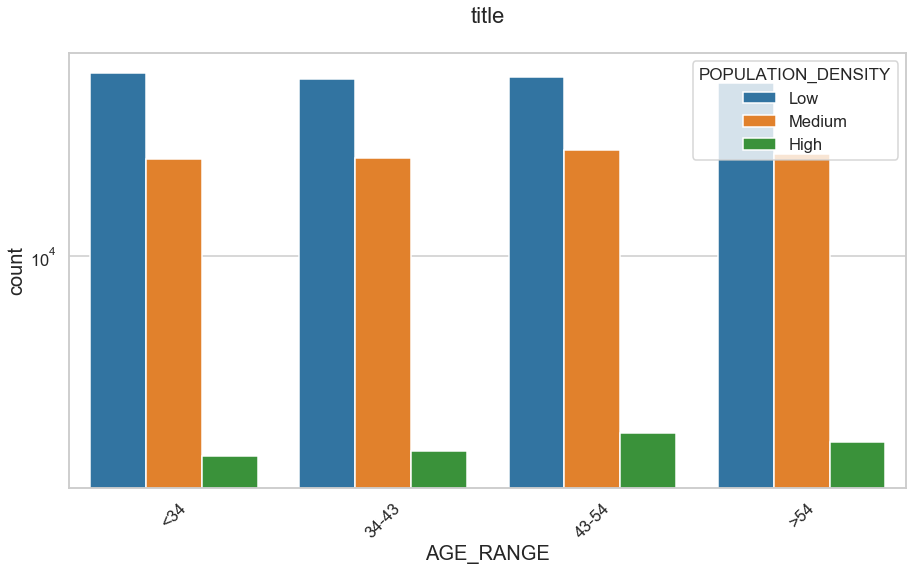

In [325]:
uniplot(df_0,'AGE_RANGE','title','POPULATION_DENSITY')

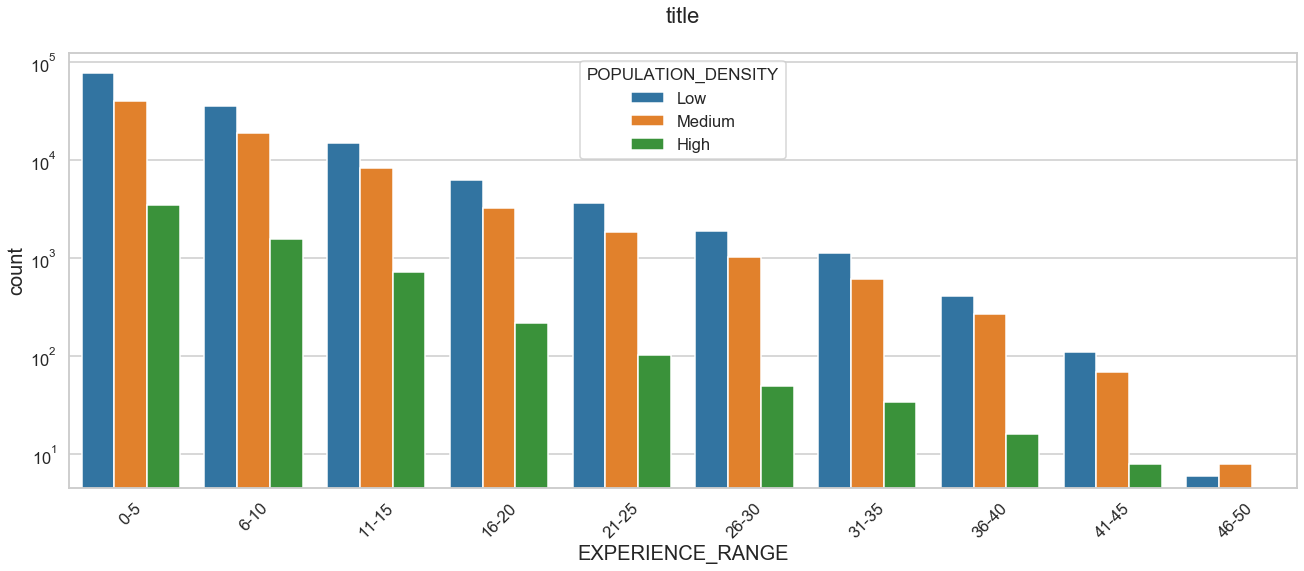

In [326]:
uniplot(df_0,'EXPERIENCE_RANGE','title','POPULATION_DENSITY')

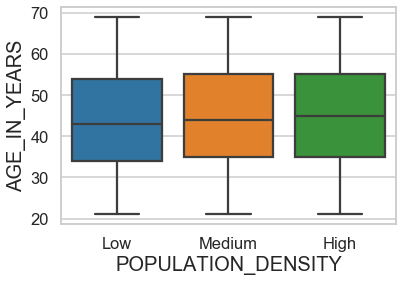

In [299]:
sns.boxplot(data=df_0,x='POPULATION_DENSITY',y='AGE_IN_YEARS')

In [328]:
df_0.iloc[:,2:].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_CONT_MOBILE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EXPERIENCE_IN_YEARS,REGISTRATION_IN_YEARS,ID_PUBLISH_IN_YEARS
AMT_INCOME_TOTAL,1.000000,0.342799,0.418953,0.349462,-0.018814,-0.186573,-0.200466,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593,-0.041338,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536,-0.062597,0.030355,-0.064963,-0.022840
AMT_CREDIT,0.342799,1.000000,0.771309,0.987250,0.023096,-0.103337,-0.112238,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225,-0.069540,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866,0.047426,0.087631,-0.013409,0.001405
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776686,0.021397,-0.132128,-0.145153,0.126615,0.028051,-0.013091,-0.022535,-0.012893,-0.023385,-0.062013,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882,-0.012202,0.052796,-0.039397,-0.014074
AMT_GOODS_PRICE,0.349462,0.987250,0.776686,1.000000,0.020185,-0.104382,-0.112601,0.135694,0.038908,-0.000707,-0.021025,-0.000723,-0.023171,-0.071373,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266,0.044601,0.088758,-0.015843,0.003587
FLAG_CONT_MOBILE,-0.018814,0.023096,0.021397,0.020185,1.000000,0.013371,0.014003,-0.004682,0.012152,0.003161,0.005562,0.003266,0.006141,-0.029275,-0.004154,-0.002916,-0.008410,0.006277,0.006974,0.026731,0.015354,0.004789,0.004456,0.001629
REGION_RATING_CLIENT,-0.186573,-0.103337,-0.132128,-0.104382,0.013371,1.000000,0.950149,-0.291624,-0.004488,0.034165,0.014203,0.033824,0.016831,0.023265,0.006661,-0.002890,0.001730,-0.069923,0.005175,0.009768,-0.002313,0.017543,-0.075763,0.008992
REGION_RATING_CLIENT_W_CITY,-0.200466,-0.112238,-0.145153,-0.112601,0.014003,0.950149,1.000000,-0.286337,-0.003027,0.030198,0.012666,0.029872,0.015956,0.022702,0.006625,-0.002666,0.001167,-0.067874,0.004667,0.008659,-0.000779,0.015967,-0.069279,0.011724
EXT_SOURCE_2,0.139598,0.129140,0.126615,0.135694,-0.004682,-0.291624,-0.286337,1.000000,0.084597,-0.021569,-0.027427,-0.021224,-0.029722,-0.188399,-0.003918,0.001597,0.001420,0.050993,-0.002961,-0.021168,0.078135,0.081166,0.052451,0.041573
EXT_SOURCE_3,-0.072401,0.036085,0.028051,0.038908,0.012152,-0.004488,-0.003027,0.084597,1.000000,0.002090,-0.032510,0.001776,-0.031174,-0.067497,-0.001342,-0.007614,-0.021413,-0.009748,-0.023860,-0.070355,0.197278,0.120986,0.103534,0.124536
OBS_30_CNT_SOCIAL_CIRCLE,-0.027828,-0.000914,-0.013091,-0.000707,0.003161,0.034165,0.030198,-0.021569,0.002090,1.000000,0.329206,0.998508,0.253000,-0.014246,0.000420,-0.001940,0.000383,0.001574,0.003966,0.031884,-0.007697,0.000731,-0.008330,0.012072
